# **1. Nhập dữ liệu**

In [3]:
# Cài đặt các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer       
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [4]:
## Nhập dữ liệu
df = pd.read_csv('customer_purchase_data.csv')

df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [6]:
# Loại bỏ các dữ liệu trùng lặp
df.drop_duplicates(inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   int64  
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 108.4 KB


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895806,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292873,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.207975,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


# **2. Thống kê mô tả**

## Biểu đồ histogram và boxplot

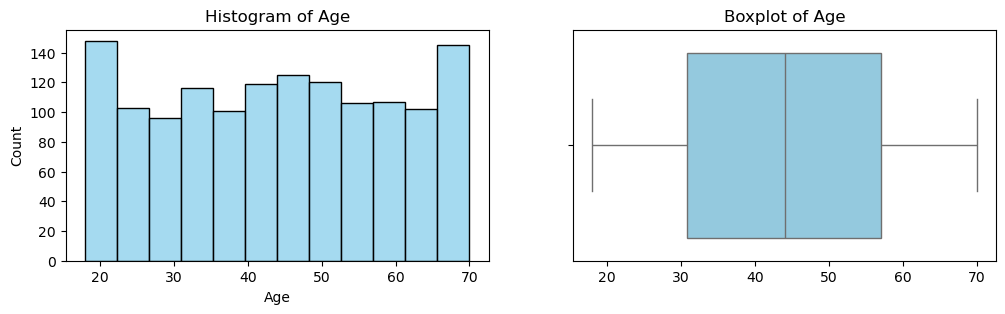

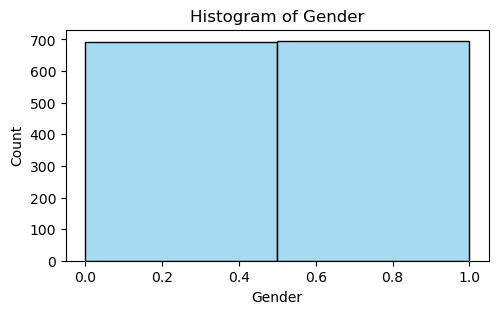

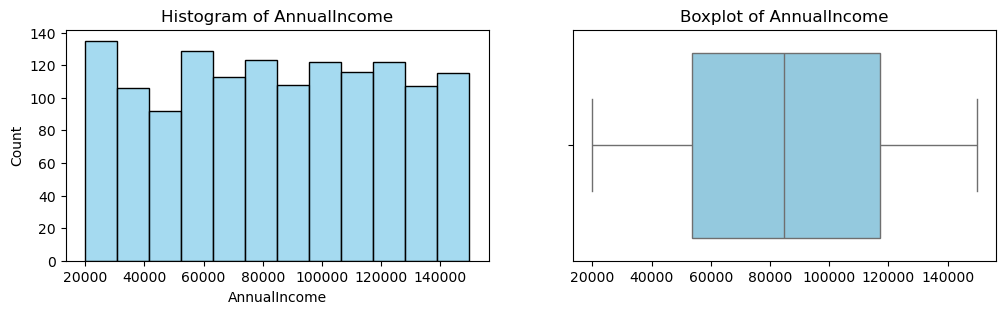

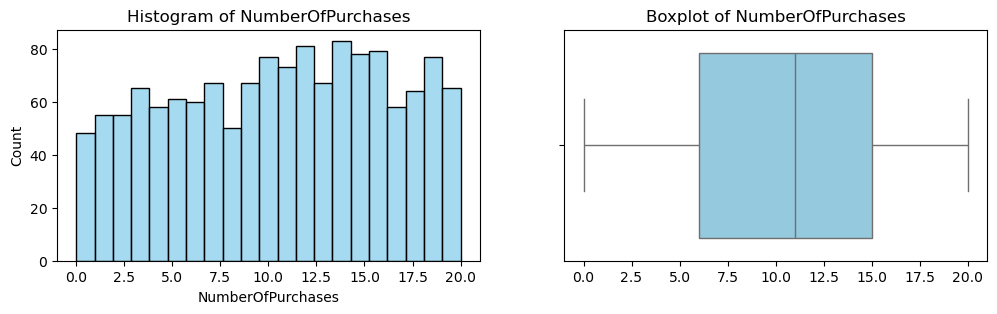

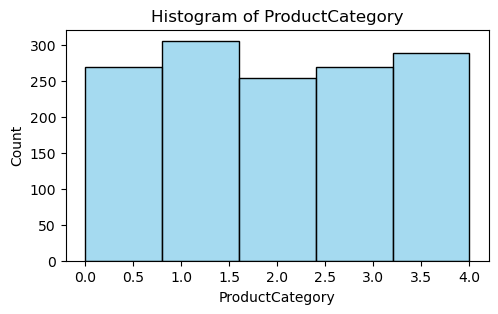

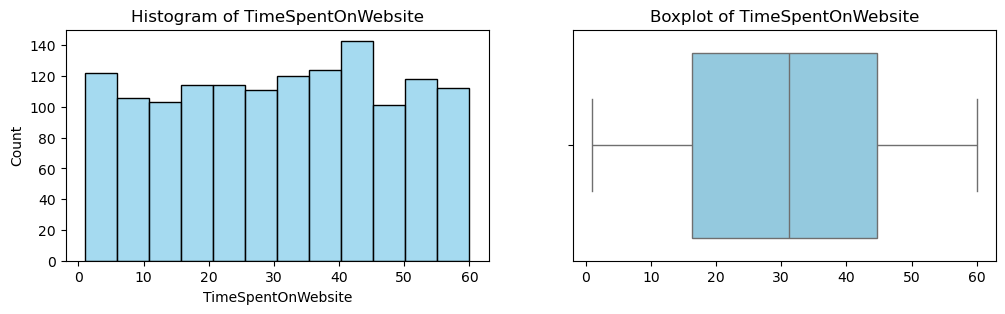

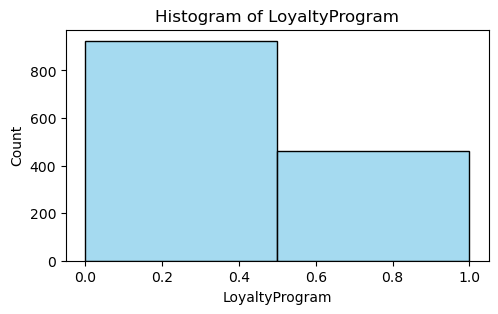

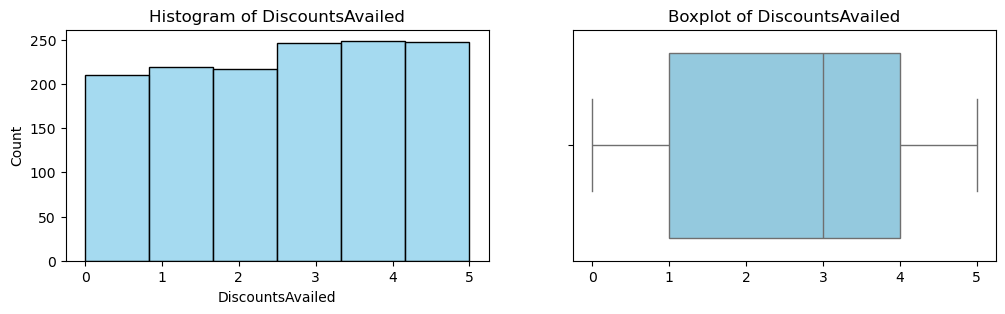

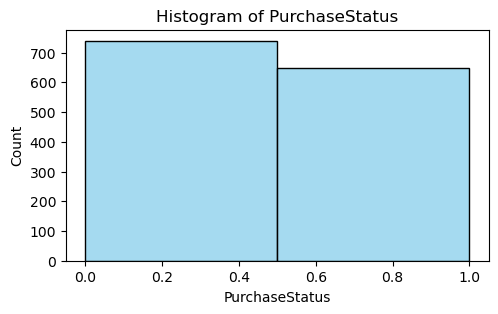

In [7]:
def plot_quantitative_var_distributions(df, var_list, bin_dict=None, no_boxplot_cols=None):    
    if no_boxplot_cols is None:
        no_boxplot_cols = ['Gender', 'ProductCategory', 'LoyaltyProgram', 'PurchaseStatus']

    for col in var_list:
        plt.figure(figsize=(12, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        if bin_dict and col in bin_dict:
            sns.histplot(data=df, x=col, bins=bin_dict[col], color='skyblue', ax=plt.gca())
        else:
            sns.histplot(data=df, x=col, color='skyblue', kde=False, ax=plt.gca())
        plt.title(f'Histogram of {col}')
        
        # Boxplot (chỉ vẽ khi col không nằm trong danh sách loại bỏ)
        if col not in no_boxplot_cols:
            plt.subplot(1, 2, 2)
            sns.boxplot(x=df[col], color='skyblue')
            plt.title(f'Boxplot of {col}')
            plt.xlabel('')

variables = df.select_dtypes(include='number').columns.tolist()

col = ['Gender', 'NumberOfPurchases', 'ProductCategory', 'LoyaltyProgram', 'DiscountsAvailed', 'PurchaseStatus']
custom_bins = df[col].nunique().to_dict()

plot_quantitative_var_distributions(df, variables, custom_bins)

Vì bộ dữ liệu không có missing value hay outlier nên trong pipeline ta không cần sử dụng Imputer

## Các biến định tính theo biến phụ thuộc

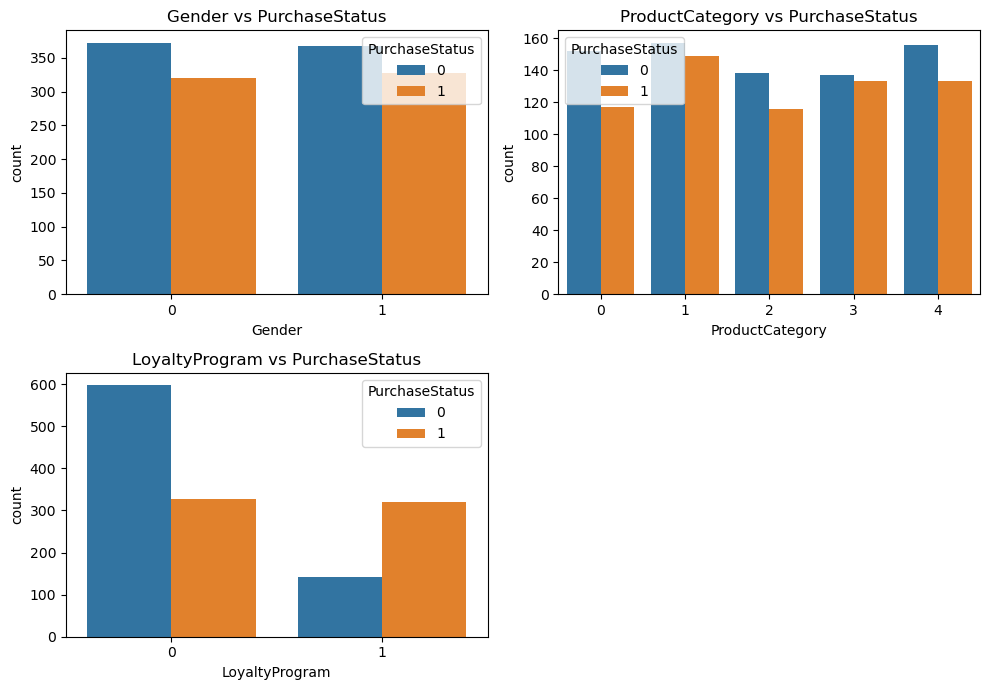

In [8]:
def plot_categorical_vs_target(df):
    plt.figure(figsize=(10, 7)) 

    # --- Subplot 1: Gender ---
    plt.subplot(2, 2, 1)  
    sns.countplot(x='Gender', hue='PurchaseStatus', data=df)
    plt.title('Gender vs PurchaseStatus')

    # --- Subplot 2: ProductCategory ---
    plt.subplot(2, 2, 2)  
    sns.countplot(x='ProductCategory', hue='PurchaseStatus', data=df)
    plt.title('ProductCategory vs PurchaseStatus')
    
    # --- Subplot 3: LoyaltyProgram ---
    plt.subplot(2, 2, 3) 
    sns.countplot(x='LoyaltyProgram', hue='PurchaseStatus', data=df)
    plt.title('LoyaltyProgram vs PurchaseStatus')

    plt.tight_layout()
    plt.show()

# Gọi hàm
plot_categorical_vs_target(df)

## Correlation heatmap

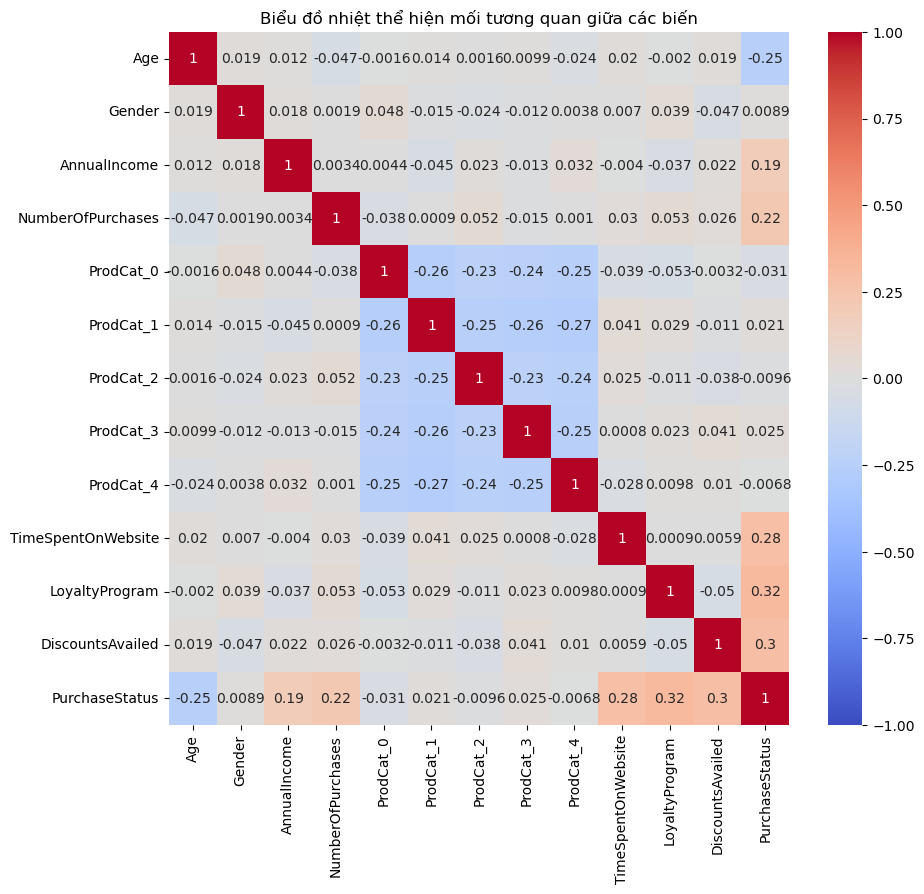

In [9]:
# Tạo dữ liệu df_corr
df_corr = df.copy()

# Tạo biến giả cho biến ProductProductCategory
col_index = df_corr.columns.get_loc("ProductCategory")
dummies = pd.get_dummies(df_corr["ProductCategory"], prefix="ProdCat")
df_corr = df_corr.drop(columns=["ProductCategory"])
df_corr = pd.concat(
    [df_corr.iloc[:, :col_index], dummies, df_corr.iloc[:, col_index:]],
    axis=1
)

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10,9))
sns.heatmap(df_corr.corr().round(4), annot=True, cmap='coolwarm', vmax=1, vmin=-1)
plt.title('Biểu đồ nhiệt thể hiện mối tương quan giữa các biến')
plt.show()

# **3. Sử dụng mô hình học máy**

## Tạo tập train và test

In [10]:
# Tách X (features) và y (target)
X = df.drop(['PurchaseStatus'], axis=1)
y = df['PurchaseStatus']

X.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
0,40,1,66120.267939,8,0,30.568601,0,5
1,20,1,23579.773583,4,2,38.240097,0,5
2,27,1,127821.306432,11,2,31.633212,1,0
3,24,1,137798.623120,19,3,46.167059,0,4
4,31,1,99300.964220,19,1,19.823592,0,0


In [11]:
# Thực hiện chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Tỷ lệ y_train: \n{y_train.value_counts(normalize=True)}")
print(f"Tỷ lệ y_test: \n{y_test.value_counts(normalize=True)}")

Kích thước X_train: (1110, 8)
Kích thước X_test: (278, 8)
Tỷ lệ y_train: 
PurchaseStatus
0    0.533333
1    0.466667
Name: proportion, dtype: float64
Tỷ lệ y_test: 
PurchaseStatus
0    0.532374
1    0.467626
Name: proportion, dtype: float64


## Tạo Pipeline xử lý dữ liệu

In [12]:
# 1. Xác định danh sách các cột
numeric_features = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
nominal_features = ['Gender', 'ProductCategory', 'LoyaltyProgram'] # Cột nominal (không có thứ tự)

# 2. Tạo pipeline con cho DỮ LIỆU SỐ
numeric_transformer = Pipeline(steps=[
    # StandardScaler: Chuẩn hóa dữ liệu (mean=0, std=1)
    ('scaler', StandardScaler())                  
])

# 3. Tạo pipeline con cho DỮ LIỆU HẠNG MỤC (NOMINAL)
nominal_transformer = Pipeline(steps=[
    # OneHotEncoder: 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 4. Kết hợp bằng ColumnTransformer
# ColumnTransformer nhận một danh sách các 'transformers'
# Mỗi transformer là một tuple: (tên_định_danh, pipeline_con, danh_sách_cột_áp_dụng)
# remainder='passthrough': Giữ lại các cột không được liệt kê (thay vì loại bỏ chúng)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_nominal', nominal_transformer, nominal_features)]
)

In [13]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'AnnualIncome', 'NumberOfPurchases',
                                  'TimeSpentOnWebsite', 'DiscountsAvailed']),
                                ('cat_nominal',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'ProductCategory',
                                  'LoyaltyProgram'])])

## Tạo Pipeline toàn diện + Sử dụng trên tập train
1.  **`preprocessor`**: (Cleaning + Transform) đã định nghĩa ở trên.
2.  **`selector`**: (Feature Selection) `SelectKBest` để chọn lọc đặc trưng.
3.  **`model`**: (Modeling) Mô hình tùy chọn

### Logistic Regression

In [14]:
full_pipeline_lg = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    # SelectPercentile: Chọn phần trăm các đặc trưng cần giữ lại 
    ('selector', SelectPercentile(score_func=f_classif, percentile=80)),
    
    # BƯỚC 3: Modeling
    # LogisticRegression: Model cuối cùng để dự đoán
    ('model', LogisticRegression(random_state=42))
])

full_pipeline_lg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('selector', SelectPercentile(percentile=80)),
                ('model', LogisticRegression(random_state=42))])

In [15]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_lg.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_lg = full_pipeline_lg.predict(X_test)

print(f"Accuracy trên tập Test (1 lần chia): {accuracy_score(y_test, y_pred_lg):.4f}")
print(f"Precision trên tập Test (1 lần chia): {precision_score(y_test, y_pred_lg):.4f}")
print(f"Recall trên tập Test (1 lần chia): {recall_score(y_test, y_pred_lg):.4f}")
print(f"F1-score trên tập Test (1 lần chia): {f1_score(y_test, y_pred_lg):.4f}")
print(f"AUC trên tập Test (1 lần chia): {roc_auc_score(y_test, y_pred_lg):.4f}")

Accuracy trên tập Test (1 lần chia): 0.8417
Precision trên tập Test (1 lần chia): 0.8258
Recall trên tập Test (1 lần chia): 0.8385
F1-score trên tập Test (1 lần chia): 0.8321
AUC trên tập Test (1 lần chia): 0.8415


### Decision Tree

In [16]:
full_pipeline_dt = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectPercentile(score_func=f_classif, percentile=80)),
    
    # BƯỚC 3: Modeling
    ('model', DecisionTreeClassifier(max_depth=8, random_state=42))
])

full_pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('selector', SelectPercentile(percentile=80)),
                ('model',
                 DecisionTreeClassifier(max_depth=8, random_state=42))])

In [17]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_dt.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_dt = full_pipeline_dt.predict(X_test)

print(f"Accuracy trên tập Test (1 lần chia): {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision trên tập Test (1 lần chia): {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall trên tập Test (1 lần chia): {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score trên tập Test (1 lần chia): {f1_score(y_test, y_pred_dt):.4f}")
print(f"AUC trên tập Test (1 lần chia): {roc_auc_score(y_test, y_pred_dt):.4f}")

Accuracy trên tập Test (1 lần chia): 0.8885
Precision trên tập Test (1 lần chia): 0.8898
Recall trên tập Test (1 lần chia): 0.8692
F1-score trên tập Test (1 lần chia): 0.8794
AUC trên tập Test (1 lần chia): 0.8873


### Suppor Vector Machine

In [18]:
full_pipeline_svm = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectPercentile(score_func=f_classif, percentile=80)),
    
    # BƯỚC 3: Modeling
    ('model', SVC(kernel="rbf", C=1, probability=True, random_state=42))
])

full_pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('selector', SelectPercentile(percentile=80)),
                ('model', SVC(C=1, probability=True, random_state=42))])

In [19]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_svm.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_svm = full_pipeline_svm.predict(X_test)

print(f"Accuracy trên tập Test (1 lần chia): {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision trên tập Test (1 lần chia): {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall trên tập Test (1 lần chia): {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score trên tập Test (1 lần chia): {f1_score(y_test, y_pred_svm):.4f}")
print(f"AUC trên tập Test (1 lần chia): {roc_auc_score(y_test, y_pred_svm):.4f}")

Accuracy trên tập Test (1 lần chia): 0.8561
Precision trên tập Test (1 lần chia): 0.8629
Recall trên tập Test (1 lần chia): 0.8231
F1-score trên tập Test (1 lần chia): 0.8425
AUC trên tập Test (1 lần chia): 0.8541


### Random Forest

In [20]:
full_pipeline_rf = Pipeline(steps=[
    # BƯỚC 1: Cleaning + Transform (Sử dụng ColumnTransformer)
    ('preprocessor', preprocessor),
    
    # BƯỚC 2: Feature Selection (Chọn đặc trưng)
    ('selector', SelectPercentile(score_func=f_classif, percentile=80)),
    
    # BƯỚC 3: Modeling
    ('model', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

full_pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'AnnualIncome',
                                                   'NumberOfPurchases',
                                                   'TimeSpentOnWebsite',
                                                   'DiscountsAvailed']),
                                                 ('cat_nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'ProductCategory',
                                                   'LoyaltyProgram'])])),
                ('selector', SelectPercentile(percentile=80)),
                ('model',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [21]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_rf.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_rf = full_pipeline_rf.predict(X_test)

print(f"Accuracy trên tập Test (1 lần chia): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision trên tập Test (1 lần chia): {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall trên tập Test (1 lần chia): {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score trên tập Test (1 lần chia): {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC trên tập Test (1 lần chia): {roc_auc_score(y_test, y_pred_rf):.4f}")

Accuracy trên tập Test (1 lần chia): 0.9209
Precision trên tập Test (1 lần chia): 0.9355
Recall trên tập Test (1 lần chia): 0.8923
F1-score trên tập Test (1 lần chia): 0.9134
AUC trên tập Test (1 lần chia): 0.9191


## Đánh giá Pipeline với Cross-validation

In [22]:
# Dùng cross-validation trên toàn bộ tập X và y train

# Định nghĩa chiến lược chia K-Fold 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
#Chọn các thước đo đánh giá
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

### Logistic Regression

In [24]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_lg = cross_validate(full_pipeline_lg, X_train, y_train, cv=kfold, scoring=scoring)
cv_scores_lg

{'fit_time': array([0.01028156, 0.0127089 , 0.00814104, 0.01102304, 0.00904655]),
 'score_time': array([0.01949453, 0.01330709, 0.01695943, 0.0155108 , 0.0130353 ]),
 'test_accuracy': array([0.79279279, 0.81981982, 0.77927928, 0.84684685, 0.78378378]),
 'test_precision': array([0.83157895, 0.81553398, 0.79591837, 0.7962963 , 0.78651685]),
 'test_recall': array([0.72477064, 0.8       , 0.72897196, 0.87755102, 0.70707071]),
 'test_f1': array([0.7745098 , 0.80769231, 0.76097561, 0.83495146, 0.74468085]),
 'test_roc_auc': array([0.89161322, 0.88921449, 0.89126371, 0.90520079, 0.86277408])}

In [25]:
## Tính trung bình các thang đo sau khi dùng K-fold
metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1", "test_roc_auc"]

mean_cv_scores_lg = {m: np.mean(cv_scores_lg[m]).round(4) for m in metrics}
mean_cv_scores_lg

{'test_accuracy': 0.8045,
 'test_precision': 0.8052,
 'test_recall': 0.7677,
 'test_f1': 0.7846,
 'test_roc_auc': 0.888}

In [26]:
## Độ lệch chuẩn (cho biết hiệu suất thay đổi như thế nào giữa các fold; std thấp là tốt và có nghĩa là mô hình ổn định)
std_cv_scores_lg = {m: np.std(cv_scores_lg[m]).round(4) for m in metrics}
std_cv_scores_lg

{'test_accuracy': 0.0254,
 'test_precision': 0.0162,
 'test_recall': 0.0634,
 'test_f1': 0.0326,
 'test_roc_auc': 0.0138}

### Decision Tree

In [27]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_dt = cross_validate(full_pipeline_dt, X_train, y_train, cv=kfold, scoring=scoring)
cv_scores_dt

{'fit_time': array([0.01548839, 0.0081141 , 0.01274347, 0.0068841 , 0.00903988]),
 'score_time': array([0.01061988, 0.01045537, 0.01048994, 0.01062346, 0.01506186]),
 'test_accuracy': array([0.86486486, 0.85135135, 0.86936937, 0.82432432, 0.86036036]),
 'test_precision': array([0.89108911, 0.85294118, 0.90625   , 0.76576577, 0.84693878]),
 'test_recall': array([0.82568807, 0.82857143, 0.81308411, 0.86734694, 0.83838384]),
 'test_f1': array([0.85714286, 0.84057971, 0.85714286, 0.81339713, 0.84263959]),
 'test_roc_auc': array([0.84626938, 0.84936915, 0.85883787, 0.82583114, 0.86774247])}

In [28]:
## Tính trung bình các thang đo sau khi dùng K-fold
mean_cv_scores_dt = {m: np.mean(cv_scores_dt[m]).round(4) for m in metrics}
mean_cv_scores_dt

{'test_accuracy': 0.8541,
 'test_precision': 0.8526,
 'test_recall': 0.8346,
 'test_f1': 0.8422,
 'test_roc_auc': 0.8496}

In [29]:
## Độ lệch chuẩn
std_cv_scores_dt = {m: np.std(cv_scores_dt[m]).round(4) for m in metrics}
std_cv_scores_dt

{'test_accuracy': 0.016,
 'test_precision': 0.0489,
 'test_recall': 0.0183,
 'test_f1': 0.016,
 'test_roc_auc': 0.0141}

### Suppor Vector Machine

In [30]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_svm = cross_validate(full_pipeline_svm, X, y, cv=kfold, scoring=scoring)
cv_scores_svm

{'fit_time': array([0.13436842, 0.12414527, 0.12204933, 0.13534284, 0.14016294]),
 'score_time': array([0.03411961, 0.02874255, 0.02513981, 0.03074551, 0.03906059]),
 'test_accuracy': array([0.86690647, 0.85971223, 0.83453237, 0.8700361 , 0.87364621]),
 'test_precision': array([0.86507937, 0.8852459 , 0.85833333, 0.90517241, 0.82014388]),
 'test_recall': array([0.84496124, 0.81203008, 0.78030303, 0.80769231, 0.91935484]),
 'test_f1': array([0.85490196, 0.84705882, 0.81746032, 0.85365854, 0.86692015]),
 'test_roc_auc': array([0.94240674, 0.92460461, 0.91474678, 0.90957614, 0.92072528])}

In [31]:
## Tính trung bình các thang đo sau khi dùng K-fold
mean_cv_scores_svm = {m: np.mean(cv_scores_svm[m]).round(4) for m in metrics}
mean_cv_scores_svm

{'test_accuracy': 0.861,
 'test_precision': 0.8668,
 'test_recall': 0.8329,
 'test_f1': 0.848,
 'test_roc_auc': 0.9224}

In [32]:
## Độ lệch chuẩn
std_cv_scores_svm = {m: np.std(cv_scores_svm[m]).round(4) for m in metrics}
std_cv_scores_svm

{'test_accuracy': 0.014,
 'test_precision': 0.0285,
 'test_recall': 0.0479,
 'test_f1': 0.0166,
 'test_roc_auc': 0.0112}

### Random Forest

In [33]:
# Gọi cross_validate với TOÀN BỘ pipeline
cv_scores_rf = cross_validate(full_pipeline_rf, X, y, cv=kfold, scoring=scoring)
cv_scores_rf

{'fit_time': array([0.19590449, 0.17528296, 0.14396596, 0.15627289, 0.18289852]),
 'score_time': array([0.02505708, 0.02601075, 0.02263331, 0.02314544, 0.02810788]),
 'test_accuracy': array([0.91366906, 0.90647482, 0.92446043, 0.93140794, 0.91696751]),
 'test_precision': array([0.91338583, 0.928     , 0.93700787, 0.93700787, 0.8976378 ]),
 'test_recall': array([0.89922481, 0.87218045, 0.90151515, 0.91538462, 0.91935484]),
 'test_f1': array([0.90625   , 0.89922481, 0.91891892, 0.92607004, 0.90836653]),
 'test_roc_auc': array([0.94917018, 0.94529427, 0.93446451, 0.94065934, 0.93374447])}

In [34]:
## Tính trung bình các thang đo sau khi dùng K-fold
mean_cv_scores_rf = {m: np.mean(cv_scores_rf[m]).round(4) for m in metrics}
mean_cv_scores_rf

{'test_accuracy': 0.9186,
 'test_precision': 0.9226,
 'test_recall': 0.9015,
 'test_f1': 0.9118,
 'test_roc_auc': 0.9407}

In [35]:
## Độ lệch chuẩn
std_cv_scores_rf = {m: np.std(cv_scores_rf[m]).round(4) for m in metrics}
std_cv_scores_rf

{'test_accuracy': 0.0086,
 'test_precision': 0.0152,
 'test_recall': 0.0166,
 'test_f1': 0.0095,
 'test_roc_auc': 0.006}

## Đánh giá cuối cùng trên tập test

### Logistic Regression

In [36]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_lg.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_lg = full_pipeline_lg.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_lg):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_lg):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_lg):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_lg):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_lg):.4f}")

Accuracy cuối cùng trên tập Test: 0.8417
Precision cuối cùng trên tập Test: 0.8258
Recall cuối cùng trên tập Test: 0.8385
F1-score cuối cùng trên tập Test: 0.8321
AUC cuối cùng trên tập Test: 0.8415


### Decision Tree

In [37]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_dt.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_dt = full_pipeline_dt.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_dt):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_dt):.4f}")

Accuracy cuối cùng trên tập Test: 0.8885
Precision cuối cùng trên tập Test: 0.8898
Recall cuối cùng trên tập Test: 0.8692
F1-score cuối cùng trên tập Test: 0.8794
AUC cuối cùng trên tập Test: 0.8873


### Suppor Vector Machine

In [38]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_svm.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_svm = full_pipeline_svm.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_svm):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_svm):.4f}")

Accuracy cuối cùng trên tập Test: 0.8561
Precision cuối cùng trên tập Test: 0.8629
Recall cuối cùng trên tập Test: 0.8231
F1-score cuối cùng trên tập Test: 0.8425
AUC cuối cùng trên tập Test: 0.8541


### Random Forest

In [39]:
# -- Huấn luyện và đánh giá thử nghiệm --
# Chỉ fit trên X_train
full_pipeline_rf.fit(X_train, y_train)

# Chỉ predict trên X_test
y_pred_rf = full_pipeline_rf.predict(X_test)

print(f"Accuracy cuối cùng trên tập Test: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision cuối cùng trên tập Test: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall cuối cùng trên tập Test: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score cuối cùng trên tập Test: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC cuối cùng trên tập Test: {roc_auc_score(y_test, y_pred_rf):.4f}")

Accuracy cuối cùng trên tập Test: 0.9209
Precision cuối cùng trên tập Test: 0.9355
Recall cuối cùng trên tập Test: 0.8923
F1-score cuối cùng trên tập Test: 0.9134
AUC cuối cùng trên tập Test: 0.9191


## Biểu đồ ROC

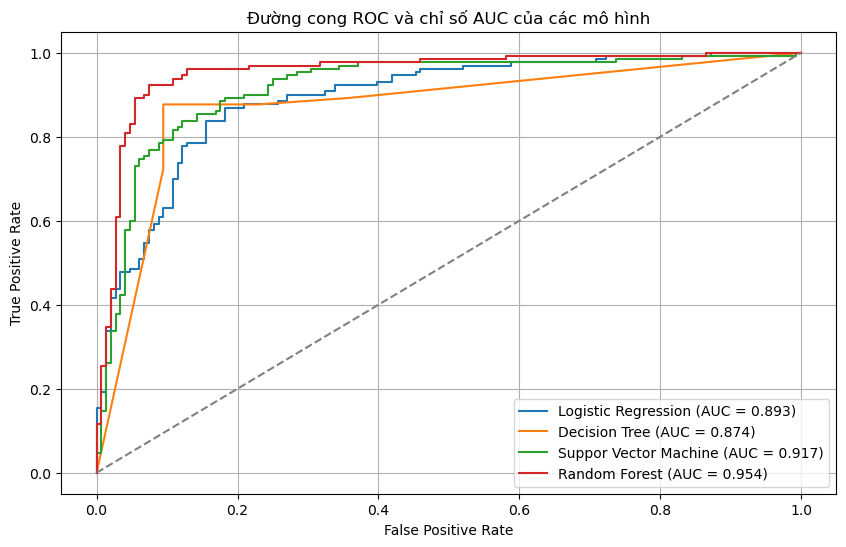

In [40]:
# Danh sách các mô hình (pipeline)
models = {
    "Logistic Regression": full_pipeline_lg,
    "Decision Tree": full_pipeline_dt,
    "Suppor Vector Machine": full_pipeline_svm,
    "Random Forest": full_pipeline_rf,
}

plt.figure(figsize=(10, 6))

for name, model in models.items():
    # Lấy xác suất lớp 1
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Tính ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Tính AUC
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    # Vẽ đường ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

# Đường chéo tham chiếu
plt.plot([0, 1], [0, 1], 'grey', linestyle='--')

# Label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Đường cong ROC và chỉ số AUC của các mô hình')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 4. Feature Importance

In [41]:
# Lọc tên các biến được giữ lại
feature_names = full_pipeline_rf.named_steps["preprocessor"].get_feature_names_out()

indexed_features = list(enumerate(feature_names))

feature_selectoresteps = full_pipeline_rf.named_steps["selector"].get_feature_names_out()

selected_indexes = [int(item.replace('x', '')) for item in feature_selectoresteps]

filtered_features = filtered_features = [name for idx, name in indexed_features if idx in selected_indexes]

print("Indexed features:", indexed_features)
print("Selected indexes:", selected_indexes)
print("Filtered features:", filtered_features)

Indexed features: [(0, 'num__Age'), (1, 'num__AnnualIncome'), (2, 'num__NumberOfPurchases'), (3, 'num__TimeSpentOnWebsite'), (4, 'num__DiscountsAvailed'), (5, 'cat_nominal__Gender_0'), (6, 'cat_nominal__Gender_1'), (7, 'cat_nominal__ProductCategory_0'), (8, 'cat_nominal__ProductCategory_1'), (9, 'cat_nominal__ProductCategory_2'), (10, 'cat_nominal__ProductCategory_3'), (11, 'cat_nominal__ProductCategory_4'), (12, 'cat_nominal__LoyaltyProgram_0'), (13, 'cat_nominal__LoyaltyProgram_1')]
Selected indexes: [0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 13]
Filtered features: ['num__Age', 'num__AnnualIncome', 'num__NumberOfPurchases', 'num__TimeSpentOnWebsite', 'num__DiscountsAvailed', 'cat_nominal__Gender_0', 'cat_nominal__ProductCategory_0', 'cat_nominal__ProductCategory_2', 'cat_nominal__ProductCategory_3', 'cat_nominal__LoyaltyProgram_0', 'cat_nominal__LoyaltyProgram_1']



 Mức độ quan trọng của các biến trong mô hình:
                                importance
num__TimeSpentOnWebsite           0.199306
num__Age                          0.174873
num__AnnualIncome                 0.167841
num__DiscountsAvailed             0.149599
num__NumberOfPurchases            0.132791
cat_nominal__LoyaltyProgram_1     0.072762
cat_nominal__LoyaltyProgram_0     0.057156
cat_nominal__Gender_0             0.013569
cat_nominal__ProductCategory_3    0.011549
cat_nominal__ProductCategory_0    0.010398
cat_nominal__ProductCategory_2    0.010156


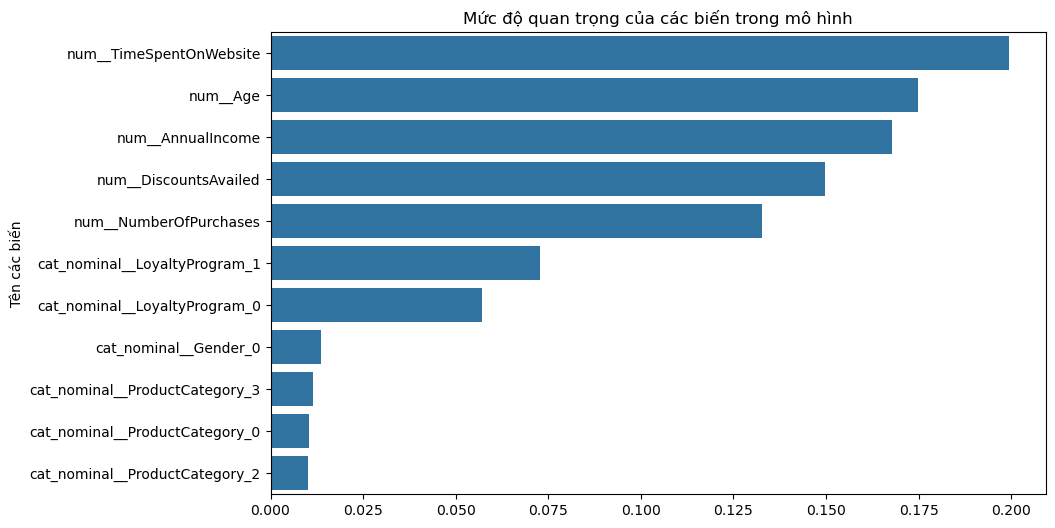

In [42]:
# Yếu tố nào quan trọng nhất dẫn đến quyết định mua hàng?
model = full_pipeline_rf.named_steps['model']

feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = filtered_features,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\n Mức độ quan trọng của các biến trong mô hình:")
print(feature_importances)

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.xlabel(None)
plt.ylabel('Tên các biến')
plt.title('Mức độ quan trọng của các biến trong mô hình')
plt.show()